# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [12]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**  
The smartcab **does not** move at all during the simulation, while all the other cars do actually move.  
The driving agent is receiving two kinds of rewards: 

* **negative** rewards when there was a green light with no ongoing traffic and the agent did not move;
* **positive** rewards when the agent idled at a red light.  
  
Since the driving agent does not move, he cannot really be involved in an accident (unless another car hits him). The traffic light colour is the ultimate responsible factor for the agent's reward. If the traffic light is red, and the agent does not move (and we know he actually never moves in this case), he will get rewarded. However, if the agent did not move when he could have moved (i.e. green light and no ongoing traffic), he would get a negative reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**  
  
**`agent.py`**  
In the `agent.py`, I have chosen and analysed the following flags with regards to their impact on the simulation: 

* **`epsilon`:** it is defined as the continuous value for the exploration factor (default is 1). `epsilon` represent the probability of choosing a random action while training. This is called the exploration factor because by choosing a random action we allow the algorithm to explore the consequences of choosing all possible actions (if we are infinitely exploring). As discussed in class, our algorithm should follow a decision-making process that is **GLIE**, i.e. greedy in limit and infinite in exploration. In other words, we should let our algorithm explore as much as possible at the beginning (e.g. by taking random actions), but we should eventually use our own estimates of the the utility values associated with specific actions.  
There is a **trade-off** between exploration and greediness. If we use a totally greedy approach (i.e. `epsilon` $ = 0$), we only use our estimates of the utilities function to decide which action to take. This may turn out to be a good strategy, but, in general, we might ignore actions that could have been better. In other words, we might get stuck into local minima due to poor utility value initialisation. On the other side, if we set `epsilon` $= 1$, i.e. we use a totally exploratory approach, we will end up learning a lot, but we will not apply what we learn since we simply keep on taking random actions.
* **`alpha`:** it is the learning rate, i.e. the proportion of the utility estimated values we change every time we update our estimates by looking at a new transistion datum. In other words, following the Q-learning update equation, everytime we update our Q estimates we retain $(1 - \alpha)$ of the previous estimated value and we add an $\alpha$ of the new estimated one.  
The learning rate has an effect on the time and accuracy of the learning process. A smaller alpha, for example, will require more update steps (i.e. you add a small proportion of new information every time you look at a new datum), but such small updates can lead to more accurate estimated values. A higher alpha, on the contrary, let the algorithm update the estimated values faster, but we might end up with less accurate estimations. Therefore it is not rate to encounter exponentially decaying learning rates, i.e. higher alpha at the beginning of the training process, and progressively lower values after.
* **`tolernace`:** defined as the `epsilon` tolerance before beginning testing. In other words, this value represents the epsilon value at which the algorithm stops exploring and becomes greedy. This is equivalent to a *testing* mode since the algorithm will simply use the estimated utilities learned in the training process in order to recommend the action to take.  
As said before, if $\epsilon = 1$, we are in *total exploration* mode. I expect `epsilon` to somehow decrease over time. This means that we progressively reduce the chances of taking a random action. A high tolerance level (e.g. 0.8) implies that we might stop exploring random actions quite soon. A low tolerance value (e.g 0.01) implies that we let our agent learn longer before becoming greedy.  
  
**`environment.py`**  
In the `environment.py` script, the `Environment` class function that is called when an agent performs an action is the function **`act`**, whose description is: *Consider an action and perform the action if it is legal. Receive a reward for the agent based on traffic laws.*  
  
**`simulator.py`**  
Both `render_text()` and `render()` displays information about the a particular state of the game. The first one, however, prints information to the terminal/command prompt, while `render()` takes care of displaying the GUI rendering.  
  
**`planner.py`**  
In the `planner.py` script, the `next_waypoint()` function first considers the East-West direction. This can be seen by the fact that the `if-else` construct firstly look at `dx`, i.e. the horizontal (East-West) position of the smartcab vs its destination horizontal coordinate.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

##### Comment #####
To do that, I am using `random.choice()` on `self.valid_actions`. Before, I make sure that `self.learning` is not `True`.  
I ran the simulation and the smartcab is actually moving (randomly).

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


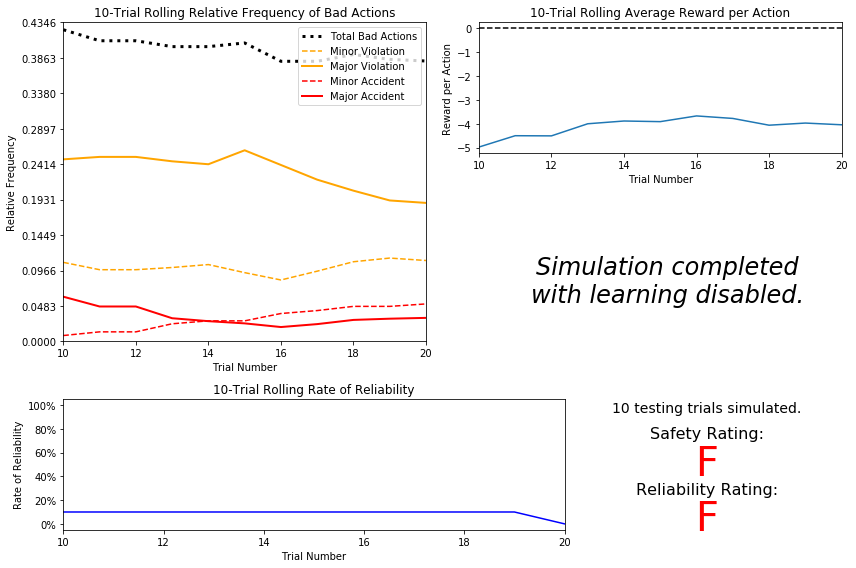

In [13]:
#### Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**  
The relative frequency of bad actions is approximately between 38 and 43% (first chart on the top left). The relative frequency of accidents (minor and major) is approximately 10% (I have summed up the relative frequencies of the two red lines). This means that between 23% and 26% of the bad actions resulted in some form of accidents.  
  
The rate of reliability is between 0% and 10%. Given the fact that the agent moves randomly (i.e. even if he has a destinaion, he is simply turning/standing at random), I actually expected him **not to reach the final destination** most of the times (if not all the times). 
  
On average, the agent is receiving a -4/-5 reward over ten trials (rolling measure). For a an agent that commits accidents 10% of the times (on average, on 10 rolling trials) and it virtually never reaches its final destination (max 10% of the times, on average, on 10 rolling trials), I wouldn't definitely expect any positive reward. By looking at the rendered output in the terminal/command line, actions like driving through a red light, driving left through a red light and idling at a green light with no oncoming traffic are heavily penalised (-10, -9 and -5, approximately). If an accident is caused, penalties can go much higher (e.g. -40 for a major accident and -20 for a minor one, approximately). Good actions (e.g. stopping at a red light or following the waypoint right) are, on average, rewarded with smaller positive numbers - by scrolling over the terminal, I saw numbers from slightly above 0 (e.g. 0.65) to numbers above 2 but below 3.  
  
As the number of trials increases, the average rolling performances do not seem to change. In thery, I would like an algorithm that improves over time (i.e. a 10-trial rolling metric improves as more trials are performed), but, as it is evident in all three charts above, there is not a clear trend emerging as the number of trials increases. This makes sense, actually. Even if the agent "sees more" (i.e. more trials), we have built in such a way that he will always take a random action, so expecting an improvement in its performance would be irrational.  
  
Both safety and reliability scores are equal to **F**. We know that an unsafe (F score) agent is one that commits **at least one major accident**. Since the thick red line (i.e. that of major accident frequency) never "touches" zero, we know that there was at least one major accident in our trials. This automatically makes the agent **unsafe**.  
With regards to reliability, we know that a very bad agent is one that fails to reach the destination on time for at least 60% of the times. We know that the 10-trial rolling rate of reliability never goes above 10%. This means that, in the best case, the agent fails to reach the destination on time 90% of the times! 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**  
The **`waypoint`** is a really important feature to give the agent information on where he should go in order to reach the final destination. You can think of the `waypoint` as the compass/GPS in the car. If the agent does not know in which direction he should go, it would be very hard to build an optimal policy. Therefore, knowing the `waypoint` does affect the **efficiency** of the smartcab.  
  
All sensor data (i.e. `inputs`) is important to determine the action that the agent should take in order to avoid accidents (thus being safer). For example, if `light` is red, the agent should stop. However, if `waypoint` is right, the agent may still turn right if there is no oncoming traffic coming from above or left. In general, all sensor data does affect the **safety** the smartcab.  
  
The `deadline` feature is not strictly necessary. At the beginning I thought it would have been relevant for efficiency, but it really does not matter. Even if there are less actions available, the agent cannot/should not ignore its destination (`waypoint`) or sensory data (`inputs`). In addition, efficiency is not affected by the number of moves left (or number of actions taken), but rather by whether the final destination is reached or not, irrespective of the number of steps it took.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**  
Ok, let me check all the possible combinations.  

* `waypoint` can be `['None', 'forward', 'left', 'right']`, where `None` means that the agent has actually reached the final destination;
* `light` can be `['green', 'red']`;
* `oncoming`, `left` and `right` can all be `['None', 'forward', 'left', 'right']`.  

In theory, while `waypoint` does have four values, the value `None` is not really relevant for the purpose of this question. If `waypoint == None`, in fact, the agent does not have to take any other action since he has reached the final destination.  
  
Therefore, the size of the state space is equal to `3 x 2 x 4 x 4 x 4 = 384`. In reinforcement learning, we assume the agent to visit every state-action combination `<s,a>` **infinitely often**. In order to do that, and given the fact that the space state size is 384, we will need many training trials.  
When I ran the simulation before (20 training trials), the code was relatively quick (less than a minute in total). Assuming between 10 and 20 moves per trial, the agent visited (at least) 200 states - not necessarily different. If I increase the training trials to 100, I should expect the agent to visit at least 1000 states (`10 x 1000`). I am quite confident I can let my agent training for more than 1,000 trials and realistically get a good policy. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

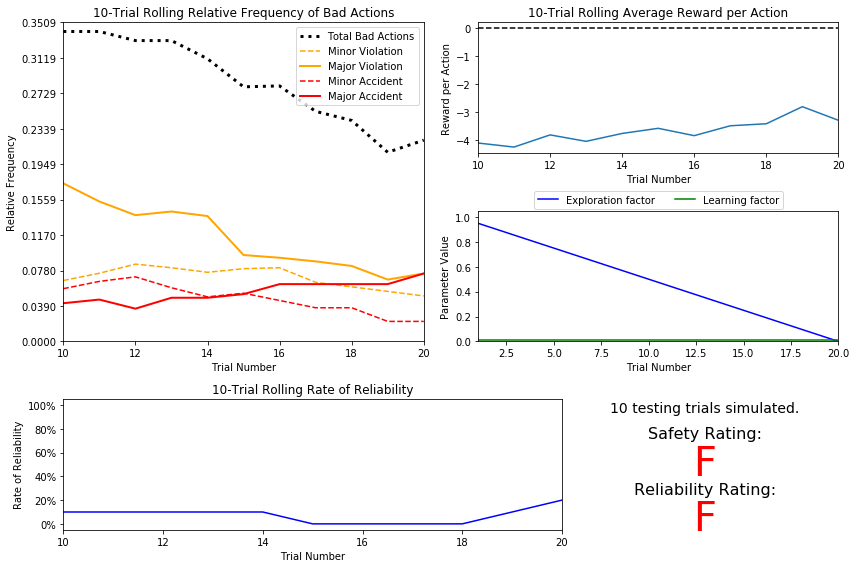

In [20]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**  
There is a couple of things that have kind of remained similar between the basic driving agent and the default Q-Learning agent. Both have **bad** safety and reliability scores. In addition, the 10-trial rolling frequency of accidents (the two red lines) for both agents is approximately the same, i.e. around 10%.  
  
It took **20 training trials** before the agent started testing. Remember that the equation used to decay $\epsilon$ was:  
  
$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$  
  
The number of training trials it takes to reach a tolerance of 0.05 is given by the equation below:  
  
$$ tolerance = \epsilon_{t} - n * 0.05 \hspace{10px}\textrm{where n is the number of training trials} $$  
  
With $tolerance = 0.05$ and $\epsilon_{t} = 1.0$, the number of training trials is equal to 19 (20 if we include the last one).  
This can also be seen in the exploration vs learning chart in the parameters panel. The exploration factor starts at 1 and becomes 0 with the 20th trial, through a linearly decaying function.  
  
As the number of training trials increased, the number of bad actions decreased (first chart on the left), from 38% (approximately) before to 20% (approximately) now. Average reward is now closer to 3 (while being 4 before) and, at the very end (i.e. last 10-trial rolling figure), reliability rate reached 20% (while being 10% before).  
  
**Overall**, the panel above demonstrates how the agent has slightly improved. In the basic agent, actions were taken **randomly** no matter what. In this case, on the contrary, the agent seems to incorporate things he has learned back into his decision-making policy and that allowed, most visibly, to reduce the percentage of bad actions by almost 20%.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

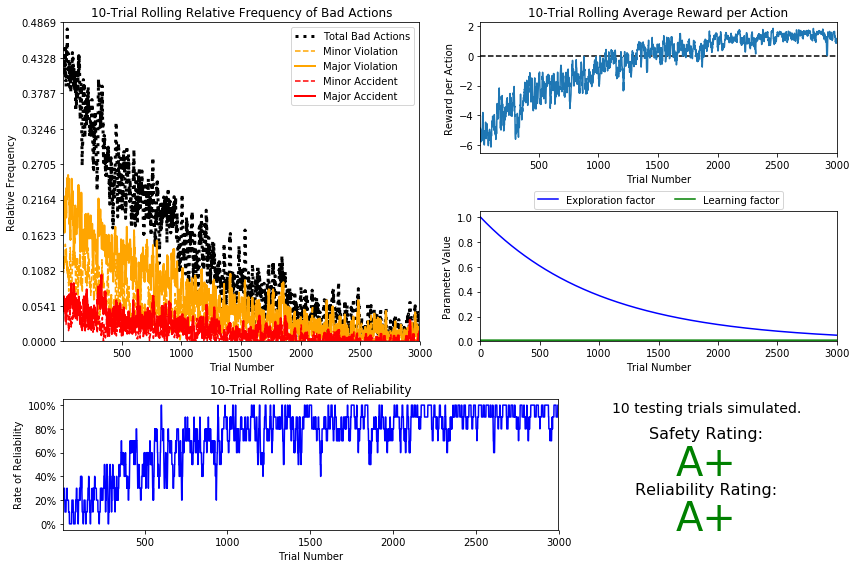

In [17]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**  
  
**Decaying function:** for the exploration factor I have used an exponential decay function. In particular I have used:  
  
$$\epsilon_{t} = e^{-at} \hspace{10px}\textrm{with }a = 0.001$$  
  
Before beginning testing, my agent went through approximately **3,000 training trials**.  
I set a learning rate $\alpha$ equal to 0.01, a figure which is a pretty good guess for the learning rate. I have experimented with higher learning rate (e.g. 0.1), but I noticed that the algorithm was not learning too well since it was too influenced by observed rewards and the frequency of bad actions was not going down as in this case.  
I have kept the default epsilon-tolerance, i.e. 0.05. This is a major factor in determining the number of training trials. As said before, the space size is 384 so I thought, mainly as an intuition, to have a training trials of at least ten times bigger (~3,000).   
  
This Q-Learner has **hugely** improved! After 3,000 training trials, the percentage of bad actions (10-trial rolling average) is below 5%, the average reward is positive (close to 2) and the rate of reliability is, on average, above 80%. Further evidence to this comes from the highest score (A+) in both safety and reliability.  
  
I am confident in saying that my agent has learned an appropriate policy for the purpose at hand. This is demonstrated by a low frequency of bad decisions (and accidents) as well as by an improved reliability score.  
  
However, I have recognised the following:

* **metrics** seem to become stationary after approximately 2,000 trials. In other words, it seems it is not necessary to perform 3,000 training trials, but 2,000 should be enough. In order to do that I can either increae the epsilon-tolernace or increase the $a$ term in the epsilon decaying function $\epsilon_{t} = e^{-at}$. If I go with the first option, this means that the epsilon-tolernace level should be equal to $e^{-0.001 * 2,000}$, which is approximately  0.135. I am going to set the tolerance level to 0.13
* **testing trials** were only 10. I would rather test my policy on a larger set, e.g. 100.  
  
Let me re-run `agent.py` with the new settings.

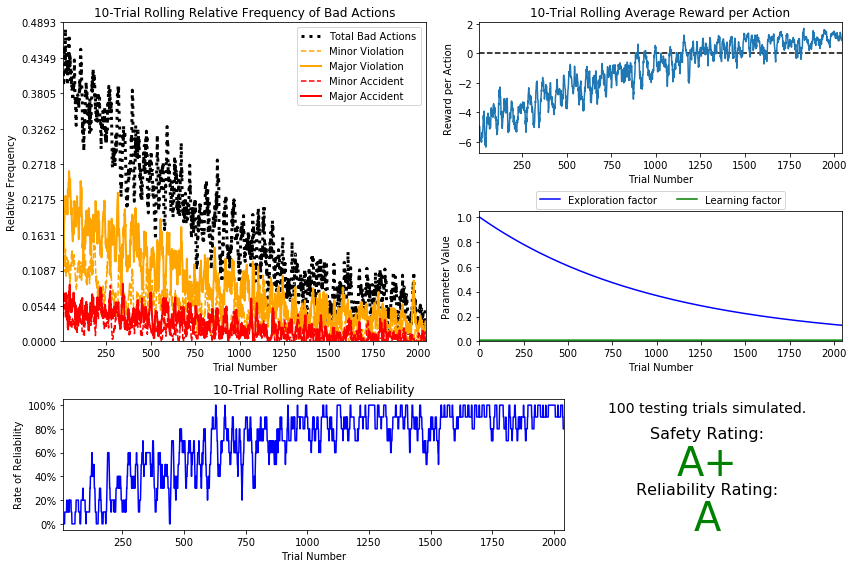

In [21]:
# Load the 'sim_improved-learning_hightol' (epsilon tolerance = 0.13 and 100 testing trials) file
#from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_hightol.csv')

After training on fewer trials (2,000 vs 3,000), with a higher epsilon-tolernance (0.13 vs 0.05), and testing on **100 trials**, I still get a good performance. Safety and reliability ratings are still high. To be honest, I expected reliablity to become slightly worse (from A+ to A) when testing on more trials, given the fact that the rate of reliablity chart does present indeeed some volatility. Overall, however, I am still satisfied with my agent and the policy he has learned.  
  
Just out of curiosity, I have re-run the model on the default epsilon tolerance (0.05), i.e. ~ 3,000 training trials to see if this can bring the reliability score on 100 trials back to A+ (see below), but it didn't (the csv file is `sim_improved-learning_lowtol.csv`).

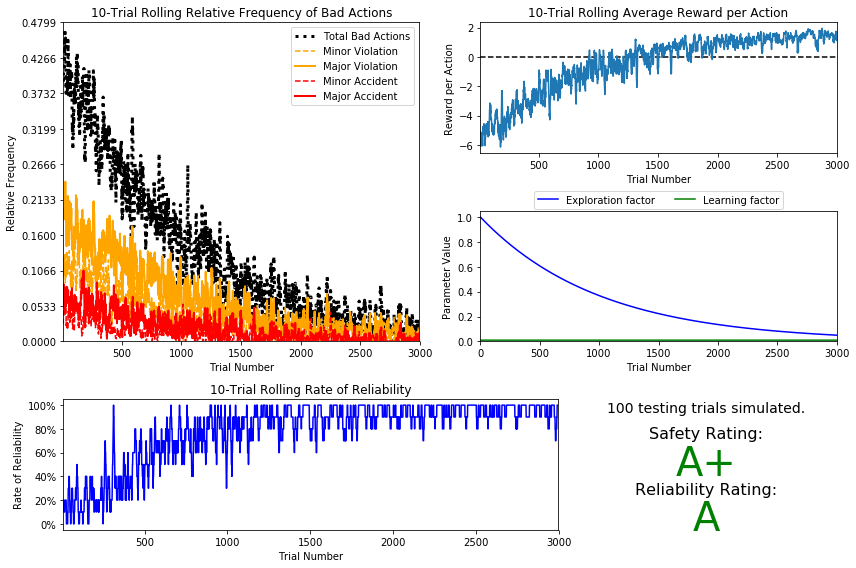

In [19]:
# Load the 'sim_improved-learning_hightol' (epsilon tolerance = 0.13 and 100 testing trials) file
#from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_lowtol.csv')

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**  
  
In this case, the **optimal policy** for the smartcab does exist, and it corresponds to the U.S. right-of-way traffic laws. In particular:

* if the traffic light is red and the waypoint is not right, the agent should stop (i.e. action `None`);
* if the traffic light is red and the waypoint is right, the agent might turn right if this does not cause an accident (i.e. left traffic not going forward or oncoming traffic not going left);
* if the traffic light is green, then it all again depends on the agent waypoint and the traffic. For example:
    *  if the waypoint is forward, the agent should go straight if this does not cause an accident
    *  if the waypoint is left, the agent should turn only if there is no oncoming traffic (either going forward or turning right)
    * if the waypoint is right, the agent should turn only if left traffic is not going forward.  
  
To check the actual policy learned by the agent I am referring to the file `sim_improved-learning_hightol.txt`, i.e. the output I have obtained running `agent.py` with an epsilon-tolerance of 0.13 (see above). For each state, the policy reported a value (the Q value) for each of the four possible actions (`forward, None, left, right`).  
Remember that I have defined a state as below:     
  <center>state = (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])</center>  
  
In practice, every state gives me indication on:

* where the car should go (waypoint)
* traffic light colour;
* the direction of the traffic coming from the left;
* the direction of the traffic coming from the right
* the direction of oncoming traffic. 
  
Please find below an example:  

('forward', 'red', 'left', 'left', 'forward')
* forward : -0.11  
* None : 0.13  
* right : 0.02  
* left : 0.00  
   
This means that in the state where the agent should head forward, the traffic light is red, traffic from the left is turning left, traffic from the right is turning left and oncoming traffic is going forward, the action with the **maximum Q value** is `None`, i.e. the agent should not move. This seems right (mainly because the traffic light is red and the car should go forward).  
  
Let me look at **other examples** and provide some comments.

<h3>Good choice</h3>
('right', 'red', None, 'right', 'left')
* forward : -0.47
* None : 0.05
* right : 0.36
* left : -0.86

In this case, the agent learned to turn right (even if the traffic light is red) when traffic is going to directions that will not cause accidents (i.e. no traffic from the left, right-turning traffic from the right, and left-turning oncoming traffic).

<h3>Interesting choice</h3>
('left', 'green', 'right', 'left', 'forward')  
* forward : 0.05
* None : -0.19
* right : 0.00
* left : -0.20
  
This is an interesting one. In theory, the car has to turn left, at a green light intersection. Left traffic is turning right (so it is irrelevant). Right traffic is turning left (but the agent still has the green light), but oncoming traffic is going forward. In theory, the agent should wait and see until the oncoming traffic is clear and then turn left. This however may take too much time and, possibly, that is why the car prefers doing something (i.e. `forward`) to doing nothing (`None`).

<h3>Wrong choice</h3>
('right', 'green', 'left', 'forward', 'forward')  
* forward : 0.04
* None : -0.10
* right : 0.00
* left : -0.58

This seems a wrong choice to me. In theory, if the agent should turn right (at a green light), with left-traffic turning left and all the others going forward, it would seem natural to me that he can turn right with no problems. The action the policy suggests, however, (although by a small margin) is to proceeding forward. A possible explanation for this could be that this particular state has not been visited often (i.e. few examples or not enough exploration) or that, at the end of the game, going forward is as good as going right (if not better).

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**  
This game is quite different from the one that was presented in class. I guess the two elements that would prevent any improvement (if not damange) from considering discounted future rewards when learning the policy are the following:
* the **environment is not static**. Even if the game is a grid, each cell can represent a different state at every step. For example, let's suppose that the first intersection at the bottom left has a red traffic light. At the following step, the traffic light might become green and so the state associated to that grid cell is different. For our purpose, even if we know which action the agent takes, while we can predict the intersection he might end up in (through `waypoint`), we cannot know which state will be associated to that intersection (since that depends on the other cars as well as the traffic light). And if we cannot have any information on the states of future steps, we cannot know any details about future reward - that is why discount factor won't work here.
* **the agent is heading to a different destination every time**. This is not an escape game. The agent needs to reach a different cell every time, starting from a randomly chosen position. This means that the agent may be biased in thinking that getting closer to a specific cell is actually the right thing to do, but that is not true. If we add future rewards, we might indeed let the agent think that a certain pattenr is better than others, but this is not true since start and end date change every time. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.